<a href="https://colab.research.google.com/github/wayaadhyasta/ProjectTim_LinearReggresion/blob/main/ProjectLinearReggresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/drive/MyDrive/dataproject_1000_rows.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Male,25,Scientist,4.4,3,92,7,Obese,120/80,96,9145,NaN
996,997,Female,52,Teacher,8.7,4,45,7,Overweight,140/95,68,1732,Sleep Apnea
997,998,Female,46,Salesperson,4.1,5,43,8,Overweight,125/85,61,3761,NaN
998,999,Male,20,Sales Representative,6.2,3,66,8,Underweight,140/95,80,8825,Sleep Apnea


Data yg di ambil adalah data prediksi durasi tidur dengan total 13 colom dan 1000 baris dengan tipe data string dan int (numerik)

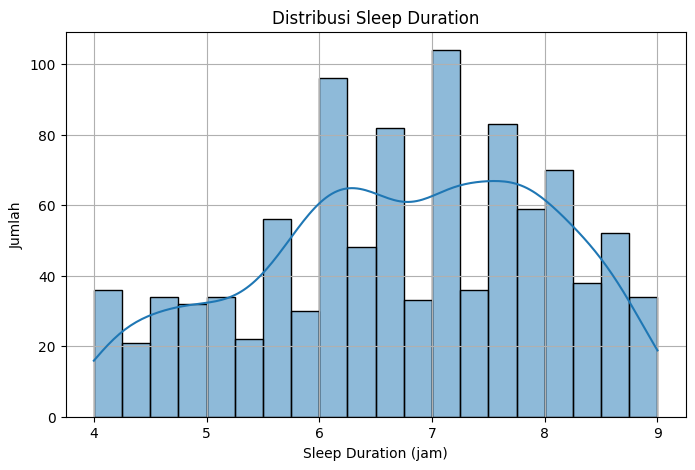

In [3]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Sleep Duration'], kde=True, bins=20)
plt.title("Distribusi Sleep Duration")
plt.xlabel("Sleep Duration (jam)")
plt.ylabel("Jumlah")
plt.grid(True)
plt.show()

Bagian diagram batang ini menjelaskan sebarapa banyak orang yang tidur sesuai dengan jam tidurnya, untuk outputny terlihat bahwa masih banyak orang yg tidur di durasi 7 jam perhari dan presentase kurang tidur di durasi 4 jam itu rentang masih dikit

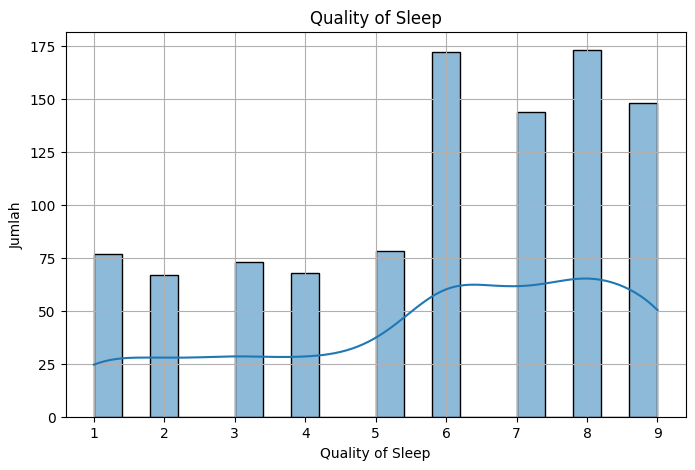

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Quality of Sleep'], kde=True, bins=20)
plt.title("Quality of Sleep")
plt.xlabel("Quality of Sleep")
plt.ylabel("Jumlah")
plt.grid(True)
plt.show()

Bagian plot diagaram batang ini menjelaskan sebrapa banyak stress level orang dengan output nya stress level di level 6 lah yg mendominasi

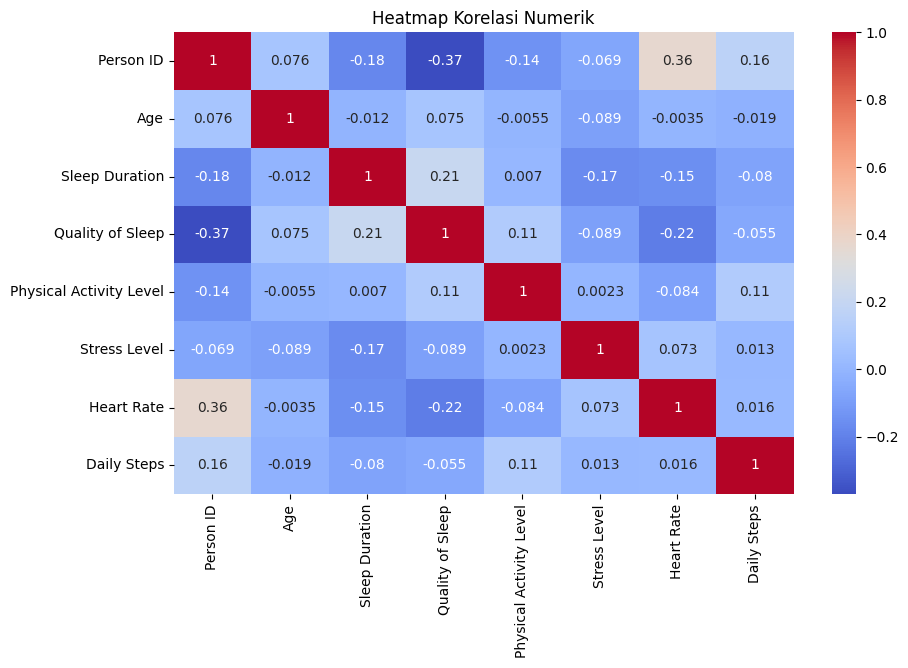

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Numerik")
plt.show()

<ipython-input-6-0b043a0c3434>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='BMI Category', y='Sleep Duration', ci=None)


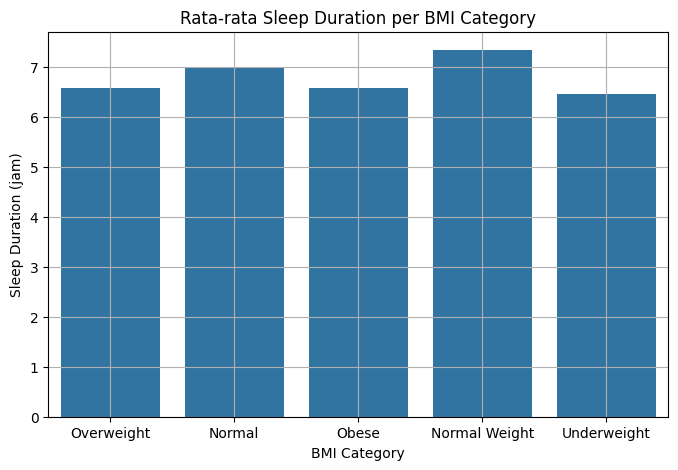

In [6]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='BMI Category', y='Sleep Duration', ci=None)
plt.title("Rata-rata Sleep Duration per BMI Category")
plt.ylabel("Sleep Duration (jam)")
plt.xlabel("BMI Category")
plt.grid(True)
plt.show()

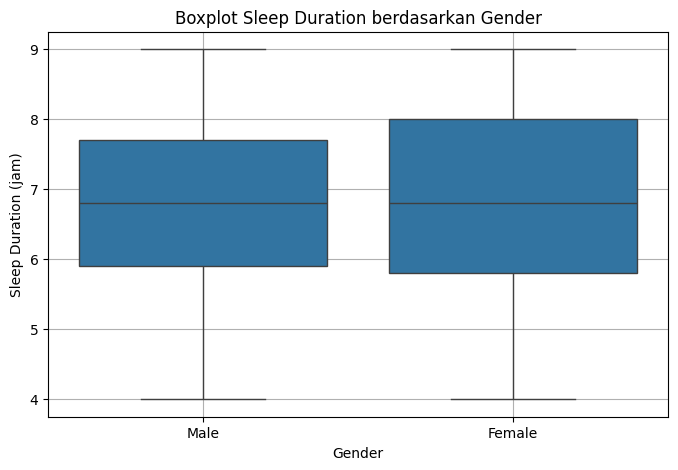

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender', y='Sleep Duration')
plt.title("Boxplot Sleep Duration berdasarkan Gender")
plt.ylabel("Sleep Duration (jam)")
plt.xlabel("Gender")
plt.grid(True)
plt.show()

In [8]:
df_model = df.drop(columns=['Person ID', 'Blood Pressure', 'Sleep Disorder'])
categorical_cols = ['Gender', 'Occupation', 'BMI Category']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le
df_model

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps
0,1,27,9,6.1,6,42,6,3,77,4200
1,1,28,1,6.2,6,60,8,0,75,10000
2,1,28,1,6.2,6,60,8,0,75,10000
3,1,28,6,5.9,4,30,8,2,85,3000
4,1,28,6,5.9,4,30,8,2,85,3000
...,...,...,...,...,...,...,...,...,...,...
995,1,25,8,4.4,3,92,7,2,96,9145
996,0,52,10,8.7,4,45,7,3,68,1732
997,0,46,7,4.1,5,43,8,3,61,3761
998,1,20,6,6.2,3,66,8,4,80,8825


bagian data ini adalah data yg sudah di cleanning atau bagian isi data dengan nilai int sudah di hapus dan ambil data yang mengandung nilai numerik atau int, agar saat pemrosessan itu bisa di terima oleh komputer

Tujuan:
"Saya ingin memprediksi berapa lama seseorang tidur berdasarkan faktor-faktor lain seperti aktivitas harian, mood, dan sebagainya."

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data
df = pd.read_csv('/content/drive/MyDrive/dataproject_1000_rows.csv')

# 1. Drop kolom yang tidak berguna
df_cleaned = df.drop(columns=['Person ID'])

# 2. Pisahkan kolom Blood Pressure jadi Systolic & Diastolic
df_cleaned[['Systolic', 'Diastolic']] = df_cleaned['Blood Pressure'].str.split('/', expand=True).astype(int)
df_cleaned = df_cleaned.drop(columns=['Blood Pressure'])

# 3. One-hot encoding kolom kategorikal
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

# 4. Pisahkan fitur dan target
X = df_encoded.drop(columns=['Sleep Duration'])
y = df_encoded['Sleep Duration']


In [24]:
# 4. Pisahkan fitur dan target
X = df_encoded.drop(columns=['Sleep Duration'])
y = df_encoded['Sleep Duration']

X: variabel independen (fitur), yaitu semua kolom kecuali "Sleep Duration".
y: variabel dependen (target), yaitu kolom Sleep Duration yang ingin diprediksi.

In [ ]:
# 5. Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dataset dibagi menjadi data latih dan uji.

In [25]:
# 6. Buat dan latih model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Membuat dan melatih model Linear Regression dari scikit-learn.
fit(): melatih model dengan data latih.
predict(): menghasilkan prediksi durasi tidur dari data uji (X_test).

In [28]:
# 7. Prediksi dan evaluasi
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluasi Model Linear Regression:")
print(f"- Mean Squared Error (MSE): {mse:.3f}")
print(f"- R-squared (R²): {r2:.3f}")

Evaluasi Model Linear Regression:
- Mean Squared Error (MSE): 1.410
- R-squared (R²): 0.067


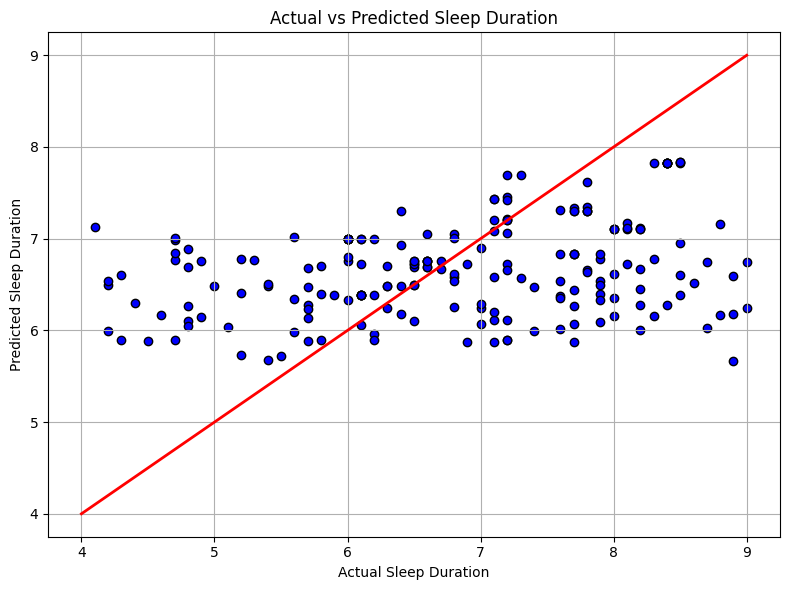

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.xlabel("Actual Sleep Duration")
plt.ylabel("Predicted Sleep Duration")
plt.title("Actual vs Predicted Sleep Duration")
plt.grid(True)
plt.tight_layout()
plt.show()

Tujuan:
Menunjukkan seberapa akurat model Linear Regression dalam memprediksi durasi tidur dengan membandingkan
nilai aktual (data asli) dan nilai prediksi (hasil model)

Keterangan Grafik:
Sumbu X: Durasi tidur aktual (y_test)
Sumbu Y: Durasi tidur hasil prediksi model (y_pred)
Titik biru: Setiap titik menunjukkan satu data (aktual vs prediksi)
Garis merah: Garis referensi y = x (prediksi = aktual)

Setiap titik pada grafik mewakili satu orang (satu data/sampel) dari dataset kamu. Titik ini menunjukkan:
Berapa jam orang itu tidur sebenarnya (sumbu X → Actual Sleep Duration)
Berapa jam yang diprediksi oleh model bahwa orang itu tidur (sumbu Y → Predicted Sleep Duration)

Aktual Tidur (Actual Sleep Duration): Berapa jam seseorang benar-benar tidur berdasarkan data yang dikumpulkan.
Prediksi Model (Predicted Sleep Duration): Ini adalah hasil tebakan model machine learning

Titik-titik ini akan digambar di grafik "Actual vs Predicted"
 → dan makin dekat ke garis merah, makin bagus prediksinya.